## Credit Risk Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Loading dataset

In [3]:
df = pd.read_csv('train.csv')
print(df.shape)
print(df.columns)
print(df.head())

(614, 13)
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120

### Data Inspection

In [4]:
print(df.isnull().sum())
print(df.info())
print(df.describe())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    fl

### Handling Missing Values

In [5]:
# Impute missing numerical values with median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_10812\973617286.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_10812\973617286.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [6]:
# Impute missing categorical values with mode
for column in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    df[column].fillna(df[column].mode()[0], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_10812\4211606911.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


### EDA (Exploratory Data Analysis)
- Visualize distribution of loan amount
- Visualize loan status by education
- Visualize income distribution

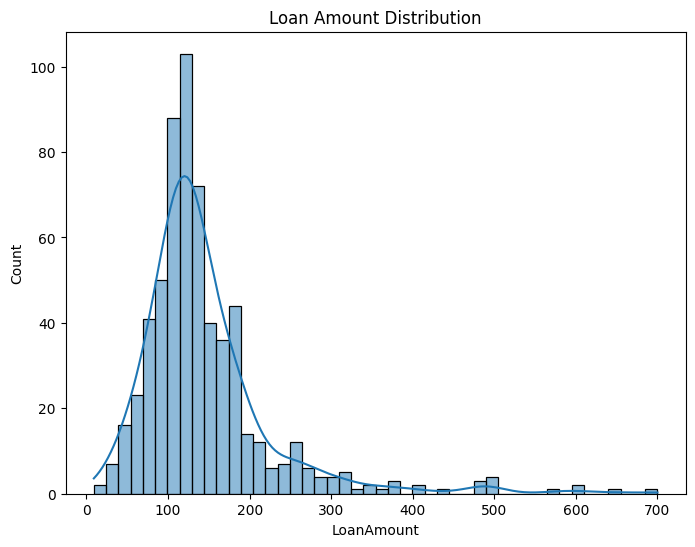

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(df['LoanAmount'], kde=True)
plt.title('Loan Amount Distribution')
plt.show()

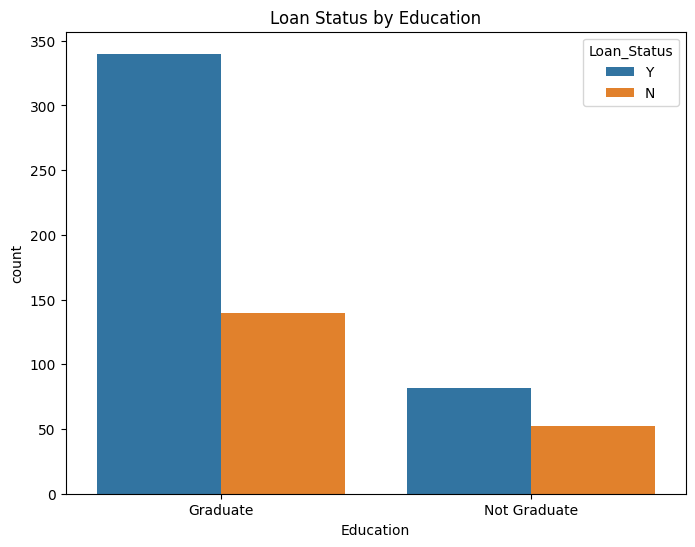

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title('Loan Status by Education')
plt.show()

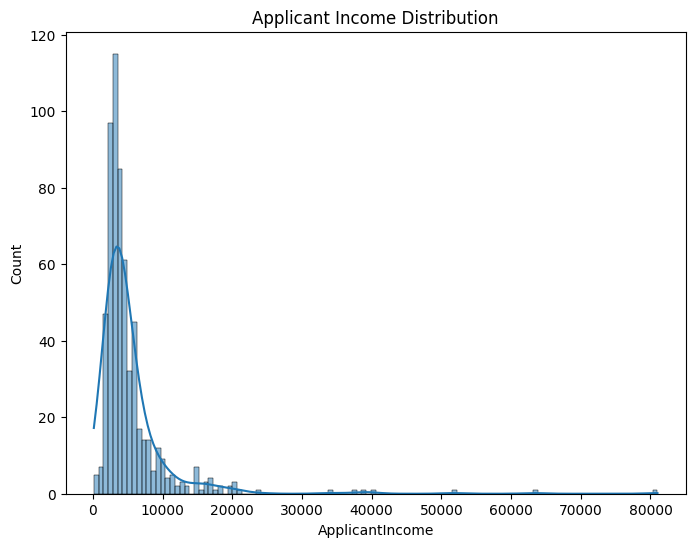

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title('Applicant Income Distribution')
plt.show()

### Data Pre-processing

In [10]:
# Encode categorical variables using Label Encoding or One-Hot Encoding:
le = LabelEncoder()
for column in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    df[column] = le.fit_transform(df[column])

In [11]:
#  Convert Dependents to numeric
df['Dependents'].replace('3+', 3, inplace=True)
df['Dependents'] = df['Dependents'].astype(int)

C:\Users\user\AppData\Local\Temp\ipykernel_10812\367811965.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].replace('3+', 3, inplace=True)


### Prepare feature vector & target 

In [12]:
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
Y = df['Loan_Status']

### Train-test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Model Training

In [14]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [15]:
# Model Prediction
y_pred = model.predict(X_test)

### Model Evaluation
- Accuracy Score
- Confusion Matrix

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7886178861788617


Confusion Matrix:
 [[18 25]
 [ 1 79]]


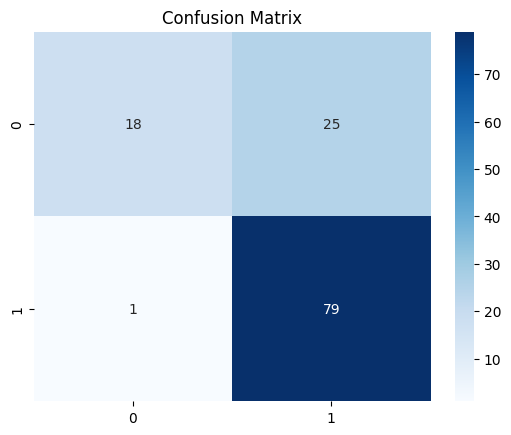

In [17]:

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Conclusion
#### Key Insights
- The dataset was relatively balanced with respect to the loan status target variable.  
- Most missing numerical values (like LoanAmount and Credit_History) were imputed with median values to ensure no data loss.  
- Visual analysis revealed that applicants with higher education levels tend to have slightly higher loan approval rates.  
- Applicant income and loan amount showed typical skewed distributions, common in real-world financial data.  
- Logistic Regression achieved an accuracy of approximately **0.7886178861788617**, indicating reasonable performance in predicting loan status.  
- The confusion matrix showed that the model correctly identified the majority of approved and rejected loans, though there may be room for further optimization.

These insights highlight key patterns in the loan prediction dataset and provide a baseline for future credit risk prediction models.

#### References
- Dataset: [Loan Prediction Dataset on Kaggle](https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset)
- pandas Library: [pandas Documentation](https://pandas.pydata.org/docs/)
- seaborn Library: [seaborn Documentation](https://seaborn.pydata.org/)
- matplotlib Library: [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
- scikit-learn Library: [scikit-learn Documentation](https://scikit-learn.org/stable/documentation.html)

